# 2014~2020까지 11, 12월달 벅스차트 뽑아와서 크리스마스 연금노래 그래프 그려보기

In [35]:
import pandas
import calendar

In [36]:
charts = pandas.DataFrame(columns = ['date','rank','title','artist','album'])

for year in range(2014, 2021, 1):
    for month in range(11, 13, 1):
        days = calendar.monthrange(year, month)[1] + 1 # 12월이 31일이기 때문
        for day in range(1, days, 1):
            filename = rf'.\Bugs\bugs_chart_{year}.{month:02}.xls'
            date = f'{year}{month:02}{day:02}'
            df = pandas.read_excel(filename, sheet_name = date)
            df.insert(0,'date',pandas.to_datetime(date))
            charts = pandas.concat([charts, df], axis = 0)
charts

,date,rank,title,artist,album
0,2014-11-01,1,헤픈엔딩 (feat. 조원선 Of 롤러코스터),에픽하이 (EPIK HIGH),신발장
1,2014-11-01,2,12시 30분,비스트(Beast),Time
2,2014-11-01,3,언제쯤이면 (duet with 아이유),윤현상,피아노포르테 (Pianoforte)
3,2014-11-01,4,스포일러,에픽하이 (EPIK HIGH),신발장
4,2014-11-01,5,어떻게 사랑이 그래요,이승환,Hwantastic
...,...,...,...,...,...
95,2020-12-31,96,Ice Cream (with Selena Gomez),BLACKPINK,Ice Cream (with Selena Gomez)
96,2020-12-31,97,METEOR,창모(CHANGMO),Boyhood
97,2020-12-31,98,뚜두뚜두 (DDU-DU DDU-DU),BLACKPINK,SQUARE UP
98,2020-12-31,99,Bet You Wanna (Feat. Cardi B),BLACKPINK,THE ALBUM


In [37]:
charts['rank'] = charts['rank'].astype('int')
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42700 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    42700 non-null  datetime64[ns]
 1   rank    42700 non-null  int32         
 2   title   42700 non-null  object        
 3   artist  42700 non-null  object        
 4   album   42700 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 1.8+ MB


In [59]:
song = 'All I Want for Christmas Is You'

mask = charts['title'] == song
ndf = charts[mask]

In [60]:
ndf.set_index('date',inplace=True)
ndf.head()

,rank,title,artist,album
date,,,,
2014-12-13,51,All I Want for Christmas Is You,Mariah Carey(머라이어 캐리),Merry Christmas (Deluxe Anniversary Edition)
2014-12-14,66,All I Want for Christmas Is You,Mariah Carey(머라이어 캐리),Merry Christmas (Deluxe Anniversary Edition)
2014-12-15,61,All I Want for Christmas Is You,Mariah Carey(머라이어 캐리),Merry Christmas (Deluxe Anniversary Edition)
2014-12-16,52,All I Want for Christmas Is You,Mariah Carey(머라이어 캐리),Merry Christmas (Deluxe Anniversary Edition)
2014-12-17,55,All I Want for Christmas Is You,Mariah Carey(머라이어 캐리),Merry Christmas (Deluxe Anniversary Edition)


(100.0, 0.0)

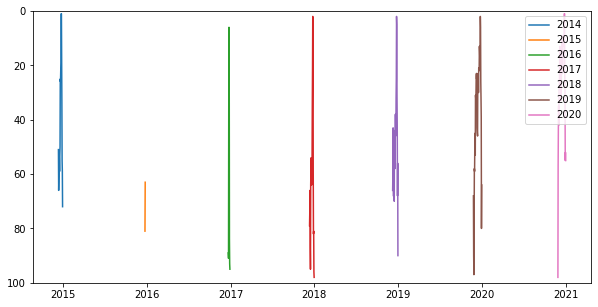

In [56]:
from matplotlib import pyplot

figure = pyplot.figure(figsize=(10,5))
ax = figure.add_subplot(1,1,1)

for i in range(2014,2021):    
    ax.plot(ndf['rank'][str(i)], label = i)
    
pyplot.legend(loc = 'upper right')
pyplot.ylim(100,0)